Why we use Chicago crime ? (Rank 1 in USA)
https://www.southwestjournal.com/us-cities-with-highest-violent-crime-rates/

# import and download library


Extract From Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

In [1]:
!pip install folium


In [2]:
import cv2
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import folium
import seaborn as sns
from plotnine import ggplot
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from plotnine import *
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
%matplotlib inline
%config InlineBackend.figure_format='retina'

# import Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data from Kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!kaggle datasets list

!kaggle datasets download -d nathaniellybrand/chicago-crime-dataset-2001-present

ref                                                        title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023              47KB  2023-08-26 11:04:57          20762        644  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023  Credit Card Fraud Detection Dataset 2023     143MB  2023-09-18 10:00:19           2544         89  1.0              
joebeachcapital/students-performance                       Students Performance                           2KB  2023-08-31 00:50:11           7526        183  1.0              
emilrueh/laptops-and-notebooks-from-2020-2023              Laptops and Notebooks from 2020-2023          79KB  2023-09-2

In [5]:
!unzip '/content/chicago-crime-dataset-2001-present.zip'

Archive:  /content/chicago-crime-dataset-2001-present.zip
  inflating: Crimes_-_2001_to_Present.csv  


In [6]:
df = pd.read_csv('/content/Crimes_-_2001_to_Present.csv')

# Describe Data

In [ ]:
df.head()

ID Case Number                    Date                   Block  IUCR  \
0  11646166    JC213529  09/01/2018 12:01:00 AM   082XX S INGLESIDE AVE  0810   
1  11645836    JC212333  05/01/2016 12:25:00 AM     055XX S ROCKWELL ST  1153   
2  11449702    JB373031  07/31/2018 01:30:00 PM  009XX E HYDE PARK BLVD  2024   
3  11643334    JC209972  12/19/2018 04:30:00 PM  056XX W WELLINGTON AVE  1320   
4  11645527    JC212744  02/02/2015 10:00:00 AM      069XX W ARCHER AVE  1153   

         Primary Type                          Description  \
0               THEFT                            OVER $500   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2           NARCOTICS                  POSS: HEROIN(WHITE)   
3     CRIMINAL DAMAGE                           TO VEHICLE   
4  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False      True  ...   8.0            44.0        06   
1                  NaN   False     False  ...  15.0            63.0        11   
2               STREET    True     False  ...   5.0            41.0        18   
3               STREET   False     False  ...  31.0            19.0        14   
4                OTHER   False     False  ...  23.0            56.0        11   

   X Coordinate Y Coordinate  Year              Updated On  Latitude  \
0           NaN          NaN  2018  04/06/2019 04:04:43 PM       NaN   
1           NaN          NaN  2016  04/06/2019 04:04:43 PM       NaN   
2           NaN          NaN  2018  04/09/2019 04:24:58 PM       NaN   
3           NaN          NaN  2018  04/04/2019 04:16:11 PM       NaN   
4           NaN          NaN  2015  04/06/2019 04:04:43 PM       NaN   

  Longitude  Location  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  

[5 rows x 22 columns]

In [ ]:
df.describe().T

count          mean           std          min  \
ID              7145092.0  7.511590e+06  3.287759e+06   634.000000   
Beat            7145092.0  1.181666e+03  7.024164e+02   111.000000   
District        7145092.0  1.128389e+01  6.948255e+00     1.000000   
Ward            7145092.0  2.274071e+01  1.384543e+01     1.000000   
Community Area  7145092.0  3.748915e+01  2.152985e+01     0.000000   
X Coordinate    7145092.0  1.164609e+06  1.687363e+04     0.000000   
Y Coordinate    7145092.0  1.885670e+06  3.230969e+04     0.000000   
Year            7145092.0  2.010777e+03  6.022115e+00  2001.000000   
Latitude        7145092.0  4.184187e+01  8.889122e-02    36.619446   
Longitude       7145092.0 -8.767147e+01  6.117771e-02   -91.686566   

                         25%           50%           75%           max  
ID              4.590390e+06  7.526629e+06  1.043055e+07  1.314650e+07  
Beat            6.210000e+02  1.034000e+03  1.724000e+03  2.535000e+03  
District        6.000000e+00  1.000000e+01  1.700000e+01  3.100000e+01  
Ward            1.000000e+01  2.300000e+01  3.400000e+01  5.000000e+01  
Community Area  2.300000e+01  3.200000e+01  5.700000e+01  7.700000e+01  
X Coordinate    1.152955e+06  1.166133e+06  1.176389e+06  1.205119e+06  
Y Coordinate    1.858905e+06  1.890672e+06  1.909135e+06  1.951573e+06  
Year            2.006000e+03  2.010000e+03  2.016000e+03  2.023000e+03  
Latitude        4.176826e+01  4.185579e+01  4.190651e+01  4.202271e+01  
Longitude      -8.771377e+01 -8.766580e+01 -8.762811e+01 -8.752453e+01

In [ ]:
rows, cols = df.shape
print("Shape of data:" , df.shape)
print("Number of rows: " , rows)
print("Number of columns: " , cols)

Shape of data: (7846809, 22)
Number of rows:  7846809
Number of columns:  22


In [ ]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846809 entries, 0 to 7846808
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

<ipython-input-19-92e8a0b955ba>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
<ipython-input-19-92e8a0b955ba>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<ipython-input-19-92e8a0b955ba>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


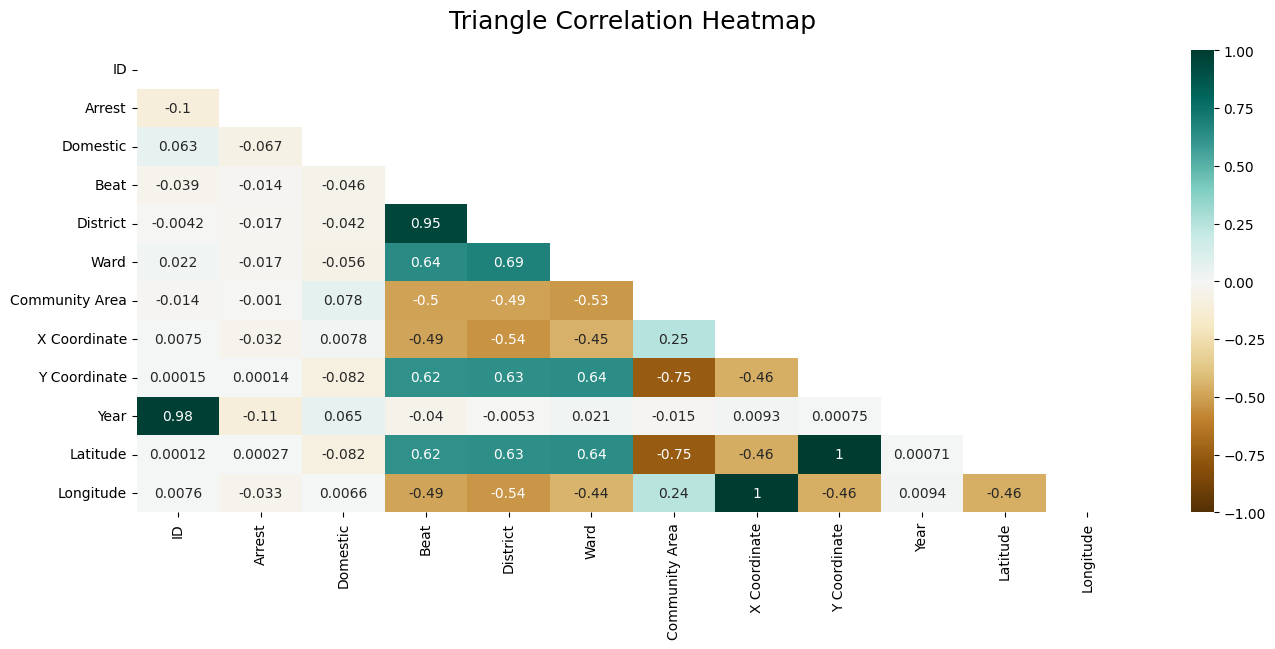

In [ ]:
# Show correlation of variables
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<ipython-input-20-b13992bfe252>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


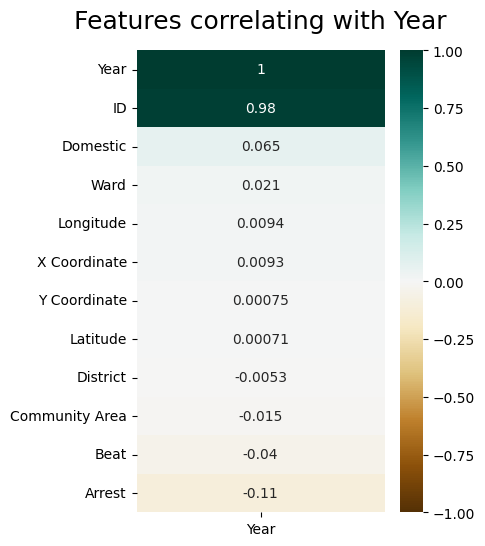

In [ ]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df.corr()[['Year']].sort_values(by='Year', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features correlating with Year', fontdict={'fontsize':18}, pad=16);

# Data Cleaning

In [ ]:
df.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10758
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Community Area          613476
FBI Code                     0
X Coordinate             88111
Y Coordinate             88111
Year                         0
Updated On                   0
Latitude                 88111
Longitude                88111
Location                 88111
dtype: int64

In [ ]:
df.drop(['ID' , 'Case Number' , 'IUCR' , 'Beat' , 'FBI Code' , 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location'], axis=1 , inplace=True)

In [ ]:
df.dropna(subset=['Location Description',"District"],inplace=True)
df.isnull().sum()

Date                         0
Block                        0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
District                     0
Ward                    614845
Community Area          613473
Year                         0
Updated On                   0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Cheack duplicated data
df.duplicated().sum()

17818

# Analyze

# 2.Which area has the highest crime frequency?
-----

In [ ]:
Area = sorted(list(df['Community Area'].unique()))
nofc = []

for i in range(len(Area)):
    count = len(df[df['Community Area'] == Area[i]])
    info = pd.DataFrame({'Area': [Area[i]], 'Count': [count]})
    nofc.append(info)

df_count = pd.concat(nofc, ignore_index=True)

In [ ]:
df_count = df_count.drop(0)

In [ ]:
community_areas = [
    "Rogers Park", "West Ridge", "Uptown", "Lincoln Square", "North Center",
    "Lake View", "Lincoln Park", "Near North Side", "Edison Park", "Norwood Park",
    "Jefferson Park", "Forest Glen", "North Park", "Albany Park", "Portage Park",
    "Irving Park", "Dunning", "Montclare", "Belmont Cragin", "Hermosa",
    "Avondale", "Logan Square", "Humboldt Park", "West Town", "Austin",
    "West Garfield Park", "East Garfield Park", "Near West Side", "North Lawndale",
    "South Lawndale", "Lower West Side", "Loop", "Near South Side", "Armour Square",
    "Douglas", "Oakland", "Fuller Park", "Grand Boulevard", "Kenwood",
    "Washington Park", "Hyde Park", "Woodlawn", "South Shore", "Chatham",
    "Avalon Park", "South Chicago", "Burnside", "Calumet Heights", "Roseland",
    "Pullman", "South Deering", "East Side", "West Pullman", "Riverdale",
    "Hegewisch", "Garfield Ridge", "Archer Heights", "Brighton Park", "McKinley Park",
    "Bridgeport", "New City", "West Elsdon", "Gage Park", "Clearing", "West Lawn",
    "Chicago Lawn", "West Englewood", "Englewood", "Greater Grand Crossing", "Ashburn",
    "Auburn Gresham", "Beverly", "Washington Heights", "Mount Greenwood", "Morgan Park",
    "O'Hare", "Edgewater"
]

In [ ]:
df_count['Area'] = df_count['Area'].astype(int)

In [ ]:
df_count['name'] = df_count['Area'].apply(lambda x: community_areas[x - 1] if 1 <= x <= 77 else "Unknown")

In [ ]:
df_count.sort_values('Count', ascending=False)

Area   Count             name
25    25  446788           Austin
8      8  251376  Near North Side
43    43  236366      South Shore
23    23  222964    Humboldt Park
28    28  216192   Near West Side
..   ...     ...              ...
74    74   16042  Mount Greenwood
55    55   15892        Hegewisch
12    12   13242      Forest Glen
47    47   10734         Burnside
9      9    7065      Edison Park

[77 rows x 3 columns]

In [ ]:
# Create a base map centered around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

community_areas_geojson = '/content/Boundaries - Community Areas (current).geojson'

# Add the GeoJSON layer for Community Areas with crime data
folium.Choropleth(
    geo_data=community_areas_geojson,
    data=df_count,
    columns=['Area', 'Count'],
    key_on='feature.properties.area_num_1',
    fill_color='YlOrRd',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Total Crime Count'
).add_to(m)

# Add GeoJSON data to the map with Community Area names
folium.GeoJson(
    community_areas_geojson,
    name='Community Areas',
    style_function=lambda feature: {
        'fillColor': 'lightblue',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},
    tooltip=folium.features.GeoJsonTooltip(
        fields=['community'],
        aliases=['Community Area: '],
        localize=True,
        sticky=True,
    ),
).add_to(m)

m


#3.What type of crime happens the most?
-------

In [11]:
def formattick(x, pos):
    if x >= 1000000:
        return f'{x/1000000:.1f}M'
    else:
        return f'{x/1000:.1f}K'

In [ ]:
# Create a dataframe that counts crimes committed from 2001 - 2022.
unique_values = df['Primary Type'].unique()
tofc = []

for i in range(len(unique_values)):
    count = len(df[df['Primary Type'] == unique_values[i]])
    info = pd.DataFrame({'Primary Type': [unique_values[i]], 'Count': [count]})
    tofc.append(info)

df_type = pd.concat(tofc, ignore_index=True)

In [ ]:
df_type

Primary Type    Count
0                     CRIMINAL DAMAGE   819073
1              PUBLIC PEACE VIOLATION    48923
2                             BATTERY  1310618
3                LIQUOR LAW VIOLATION    12835
4                            BURGLARY   392132
5                               THEFT  1512295
6                   CRIMINAL TRESPASS   197028
7                   WEAPONS VIOLATION   102591
8                       OTHER OFFENSE   443836
9                             ROBBERY   270269
10                        SEX OFFENSE    26631
11                MOTOR VEHICLE THEFT   346351
12                            ASSAULT   471277
13                          NARCOTICS   670116
14                 DECEPTIVE PRACTICE   306324
15                CRIM SEXUAL ASSAULT    24099
16                          OBSCENITY      760
17         OFFENSE INVOLVING CHILDREN    49869
18   INTERFERENCE WITH PUBLIC OFFICER    17943
19                  HUMAN TRAFFICKING       91
20                              ARSON    11998
21                           GAMBLING    13408
22                       PROSTITUTION    61386
23                       INTIMIDATION     4330
24                         KIDNAPPING     6051
25                       NON-CRIMINAL      173
26  CONCEALED CARRY LICENSE VIOLATION     1111
27                           STALKING     4546
28                           HOMICIDE    12345
29            CRIMINAL SEXUAL ASSAULT     6301
30           OTHER NARCOTIC VIOLATION      136
31                   PUBLIC INDECENCY      184
32                     NON - CRIMINAL       38
33   NON-CRIMINAL (SUBJECT SPECIFIED)        9
34                          RITUALISM       15

In [ ]:
# If the number of cases that occurred is less than 80000, they will be combined as other.
df_type_filtered = df_type[df_type['Count'] >= 80000]
count_sum = df_type[df_type['Count'] < 80000]['Count'].sum()
other = pd.DataFrame({'Primary Type': ['OTHER'], 'Count': [count_sum]})
df_type_filtered = df_type_filtered.sort_values(by='Count', ascending=False)
df_type_filtered = pd.concat([df_type_filtered, other], ignore_index=True)
df_type_filtered

Primary Type    Count
0                 THEFT  1512295
1               BATTERY  1310618
2       CRIMINAL DAMAGE   819073
3             NARCOTICS   670116
4               ASSAULT   471277
5         OTHER OFFENSE   443836
6              BURGLARY   392132
7   MOTOR VEHICLE THEFT   346351
8    DECEPTIVE PRACTICE   306324
9               ROBBERY   270269
10    CRIMINAL TRESPASS   197028
11    WEAPONS VIOLATION   102591
12                OTHER   303182

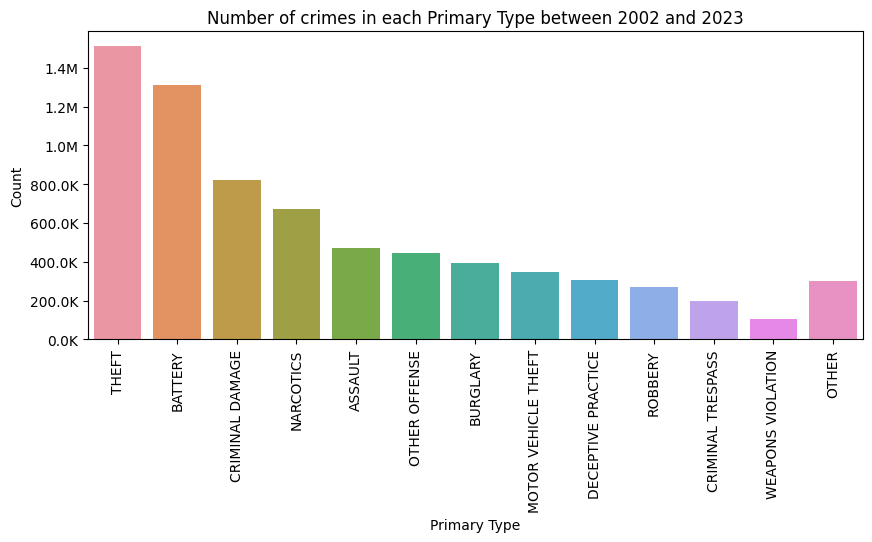

In [ ]:
# display a graph
fig, ax = plt.subplots(figsize=(10,4))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formattick))

sns.barplot(x=df_type_filtered["Primary Type"], y=df_type_filtered["Count"], data=df_type_filtered)
plt.xticks(rotation=90)
plt.title("Number of crimes in each Primary Type between 2002 and 2023")
plt.show()

#What are the top 3 of each primary type?

In [7]:
names_to_match1 = [2017,2018,2019] # ช่วงก่อนโควิด
names_to_match2 = [2020,2021,2022] # ช่วงโควิด

df_beforecovid = df[df['Year'].isin(names_to_match1)].sort_values(by=['Year'])
df_covid = df[df['Year'].isin(names_to_match2)].sort_values(by=['Year'])

In [8]:
unique_value_theft = df_beforecovid[df_beforecovid['Primary Type'] == "THEFT"]["Description"].unique()

theft = []
for i in range(len(unique_value_theft)):
    count2 = len(df_beforecovid[(df_beforecovid['Primary Type'] == "THEFT") & (df_beforecovid['Description'] == unique_value_theft[i])])
    count3 = len(df_covid[(df_covid['Primary Type'] == "THEFT") & (df_covid['Description'] == unique_value_theft[i])])

    info = pd.DataFrame({'Description': [unique_value_theft[i]], 'Count Beforecovid': [count2],'Count Covid': [count3]})
    theft.append(info)

theft_df = pd.concat(theft, ignore_index=True)
theft_df = theft_df.sort_values(by='Count Beforecovid', ascending=False)
theft_df = theft_df[:3]
theft_df

Description  Count Beforecovid  Count Covid
0  $500 AND UNDER              72539        52584
3       OVER $500              45359        43861
2   FROM BUILDING              32076        13795

In [ ]:
unique_value_battery = df_beforecovid[df_beforecovid['Primary Type'] == "BATTERY"]["Description"].unique()

battery = []
for i in range(len(unique_value_battery)):
    count2 = len(df_beforecovid[(df_beforecovid['Primary Type'] == "BATTERY") & (df_beforecovid['Description'] == unique_value_battery[i])])
    count3 = len(df_covid[(df_covid['Primary Type'] == "BATTERY") & (df_covid['Description'] == unique_value_battery[i])])

    info = pd.DataFrame({'Description': [unique_value_battery[i]], 'Count Beforecovid': [count2],'Count Covid': [count3]})
    battery.append(info)

battery_df = pd.concat(battery, ignore_index=True)
battery_df = battery_df.sort_values(by='Count Beforecovid', ascending=False)
battery_df  = battery_df[:3]
battery_df


Description  Count Beforecovid  Count Covid
0        DOMESTIC BATTERY SIMPLE              71618        58757
2                         SIMPLE              48643        36495
4  AGGRAVATED: OTHER DANG WEAPON               5490          167

In [ ]:
unique_value_Cdamage = df_beforecovid[df_beforecovid['Primary Type'] == "CRIMINAL DAMAGE"]["Description"].unique()

Cdamage = []
for i in range(len(unique_value_Cdamage)):
    count2 = len(df_beforecovid[(df_beforecovid['Primary Type'] == "CRIMINAL DAMAGE") & (df_beforecovid['Description'] == unique_value_Cdamage[i])])
    count3 = len(df_covid[(df_covid['Primary Type'] == "CRIMINAL DAMAGE") & (df_covid['Description'] == unique_value_Cdamage[i])])

    info = pd.DataFrame({'Description': [unique_value_Cdamage[i]], 'Count Beforecovid': [count2],'Count Covid': [count3]})
    Cdamage.append(info)

Cdamage_df = pd.concat(Cdamage, ignore_index=True)
Cdamage_df = Cdamage_df.sort_values(by='Count Beforecovid', ascending=False)
Cdamage_df  = Cdamage_df[:3]
Cdamage_df

Description  Count Beforecovid  Count Covid
2          TO PROPERTY              39745        36804
1           TO VEHICLE              38574        36427
3  CRIMINAL DEFACEMENT               2752         1581

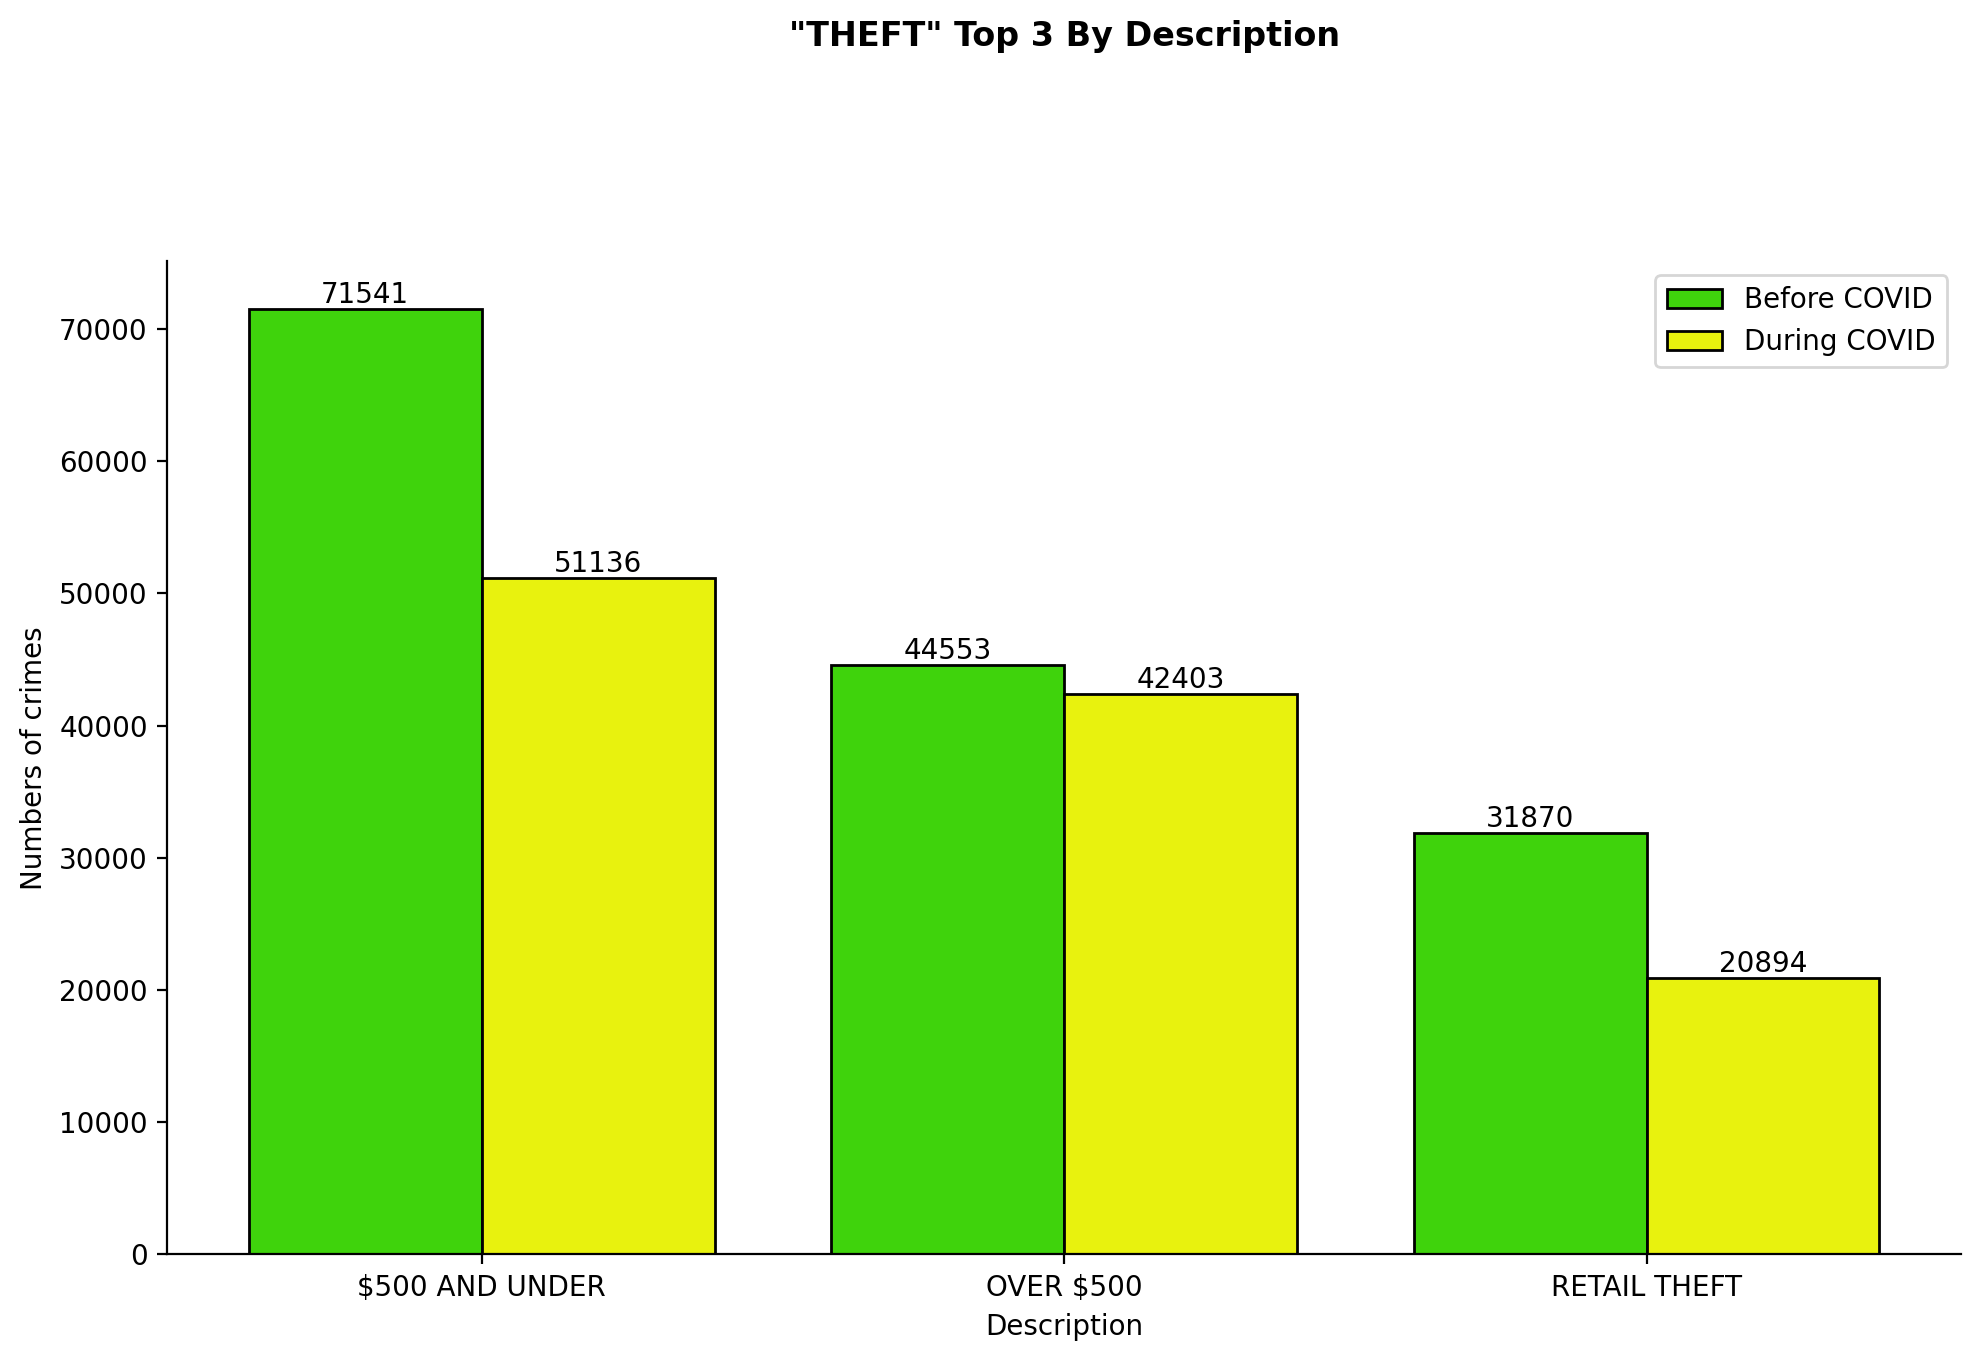

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

x = np.arange(len(theft_df['Description']))
width = 0.4

bars1 = plt.bar(x - width/2, theft_df['Count Beforecovid'], color='#3FD30C', width=width, label='Before COVID', edgecolor='black')
bars2 = plt.bar(x + width/2, theft_df['Count Covid'], color='#E8F20E', width=width, label='During COVID', edgecolor='black')
plt.xlabel("Description")
plt.ylabel("Numbers of crimes")

plt.xticks(x, theft_df['Description'])

plt.legend()

for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    yval2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2, yval1, round(yval1, 2), ha='center', va='bottom', color='black', size=10)
    plt.text(bar2.get_x() + bar2.get_width()/2, yval2, round(yval2, 2), ha='center', va='bottom', color='black', size=10)

plt.title('"THEFT" Top 3 By Description', y=1.2,fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


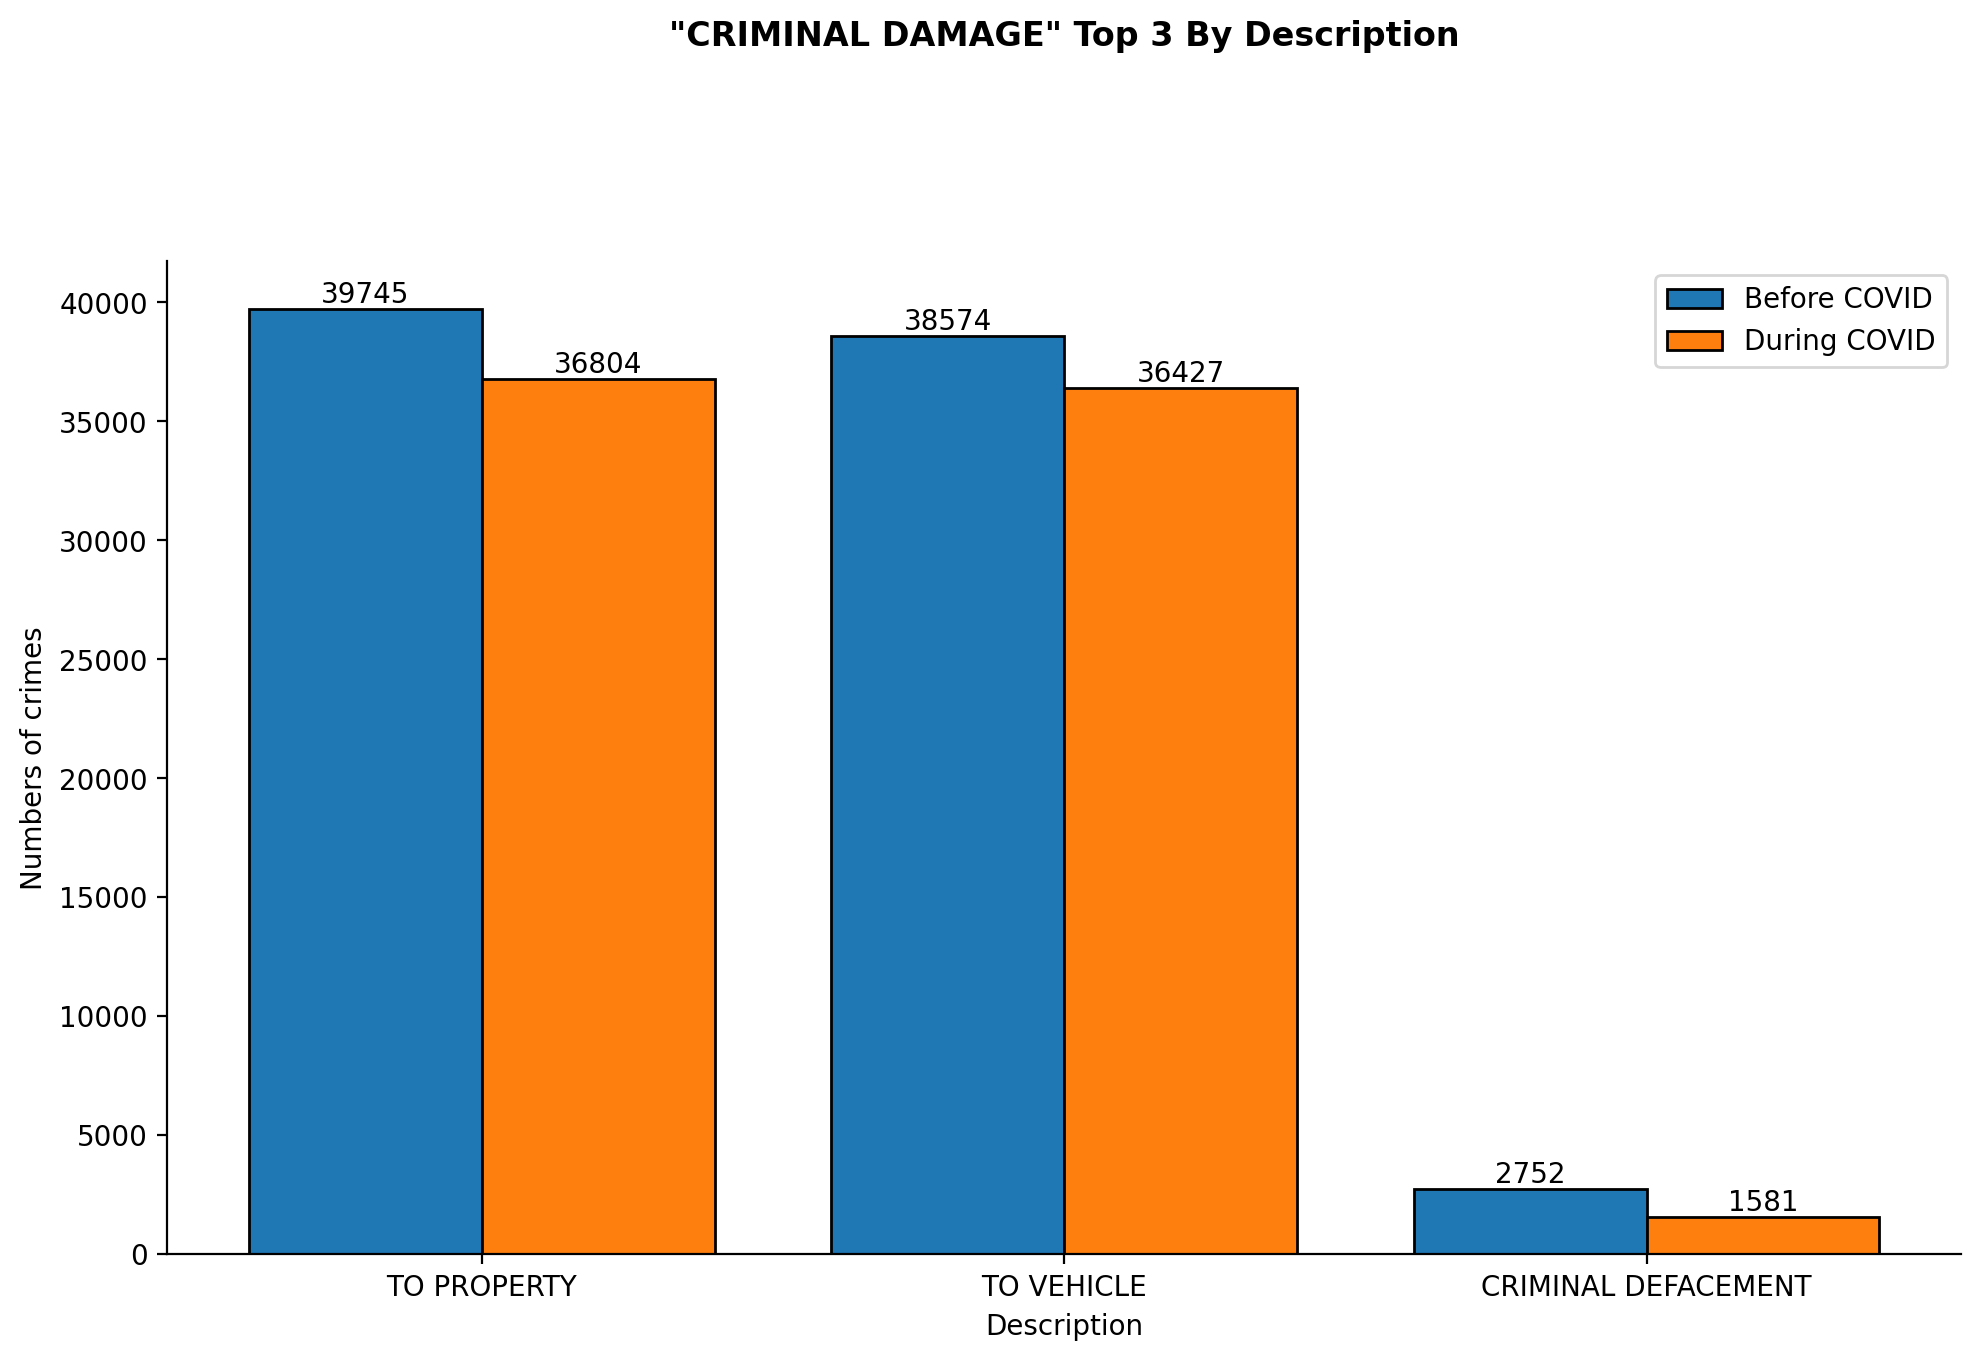

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

x = np.arange(len(Cdamage_df['Description']))
width = 0.4

bars1 = plt.bar(x - width/2, Cdamage_df['Count Beforecovid'], color='#1f77b4', width=width, label='Before COVID', edgecolor='black')
bars2 = plt.bar(x + width/2, Cdamage_df['Count Covid'], color='#ff7f0e', width=width, label='During COVID', edgecolor='black')

plt.xlabel("Description")
plt.ylabel("Numbers of crimes")

plt.xticks(x, Cdamage_df['Description'])

plt.legend()

for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    yval2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2, yval1, round(yval1, 2), ha='center', va='bottom', color='black', size=10)
    plt.text(bar2.get_x() + bar2.get_width()/2, yval2, round(yval2, 2), ha='center', va='bottom', color='black', size=10)

plt.title('"CRIMINAL DAMAGE" Top 3 By Description', y=1.2,fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

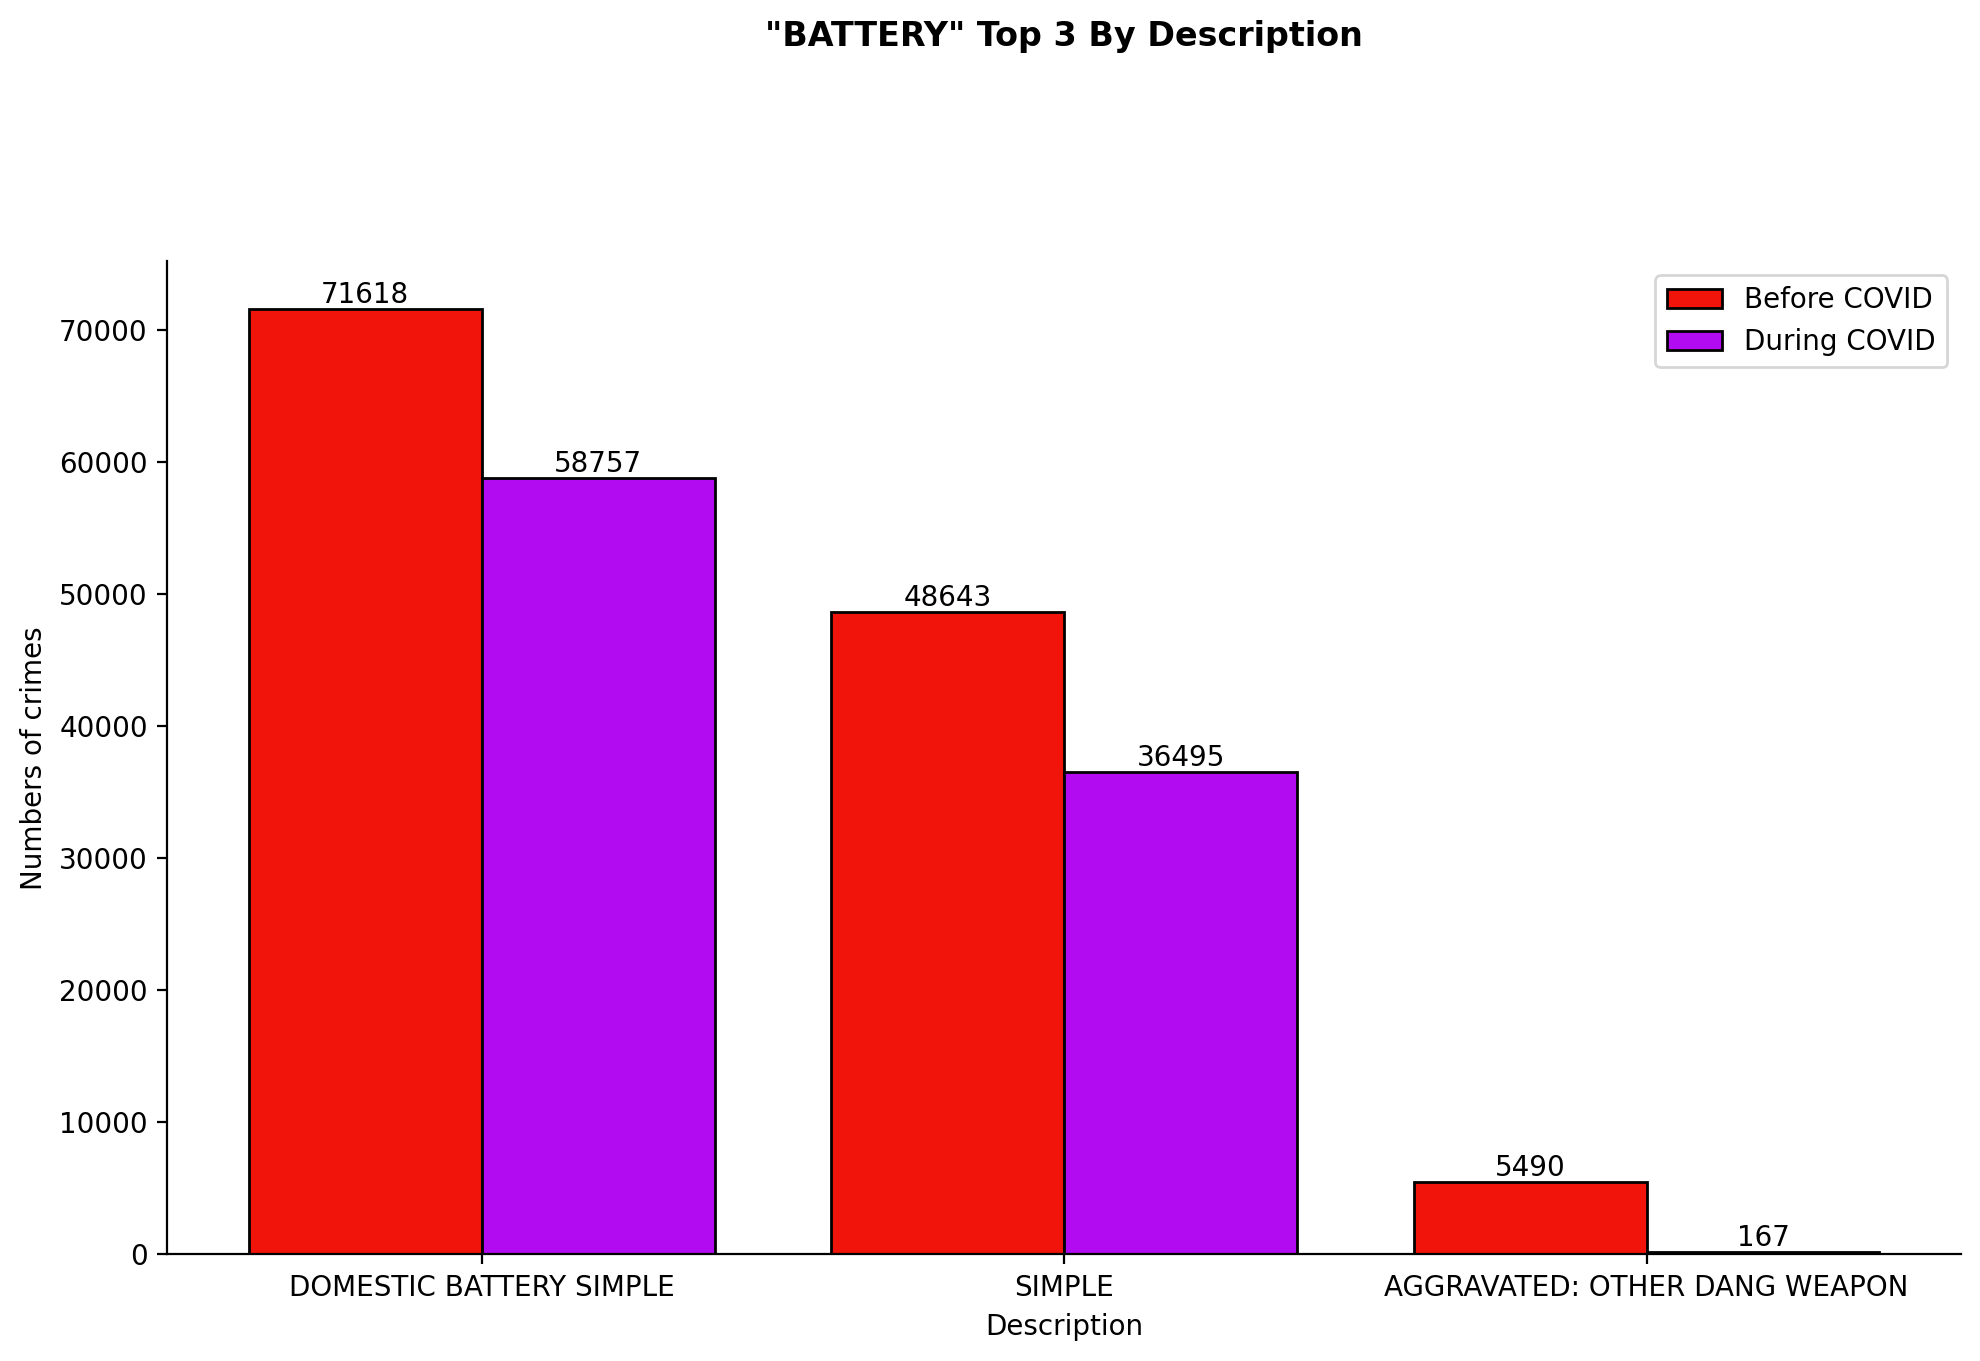

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

x = np.arange(len(battery_df['Description']))
width = 0.4

bars1 = plt.bar(x - width/2, battery_df['Count Beforecovid'], color='#F1140A', width=width, label='Before COVID', edgecolor='black')
bars2 = plt.bar(x + width/2, battery_df['Count Covid'], color='#B20AF1', width=width, label='During COVID', edgecolor='black')
plt.xlabel("Description")
plt.ylabel("Numbers of crimes")

plt.xticks(x, battery_df['Description'])

plt.legend()

for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    yval2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2, yval1, round(yval1, 2), ha='center', va='bottom', color='black', size=10)
    plt.text(bar2.get_x() + bar2.get_width()/2, yval2, round(yval2, 2), ha='center', va='bottom', color='black', size=10)

plt.title('"BATTERY" Top 3 By Description', y=1.2,fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

#4. Crime rate in Chicago 2001-2022

In [ ]:
# df_count is dataframe that count rows(Number of crimes) in each year 2001 to 2022
year = list(range(2001,2023))
nofc = []

for i in range(len(year)):
    count = len(df[df['Year'] == year[i]])
    info = pd.DataFrame({'Year': [year[i]], 'Count': [count]})
    nofc.append(info)

df_count = pd.concat(nofc, ignore_index=True)

In [ ]:
df_count

Year   Count
0   2001  485885
1   2002  486805
2   2003  475983
3   2004  469421
4   2005  453772
5   2006  448178
6   2007  437087
7   2008  427169
8   2009  392825
9   2010  370505
10  2011  351975
11  2012  336273
12  2013  307478
13  2014  275745
14  2015  264775
15  2016  269808
16  2017  269092
17  2018  268811
18  2019  261290
19  2020  212170
20  2021  208733
21  2022  238712

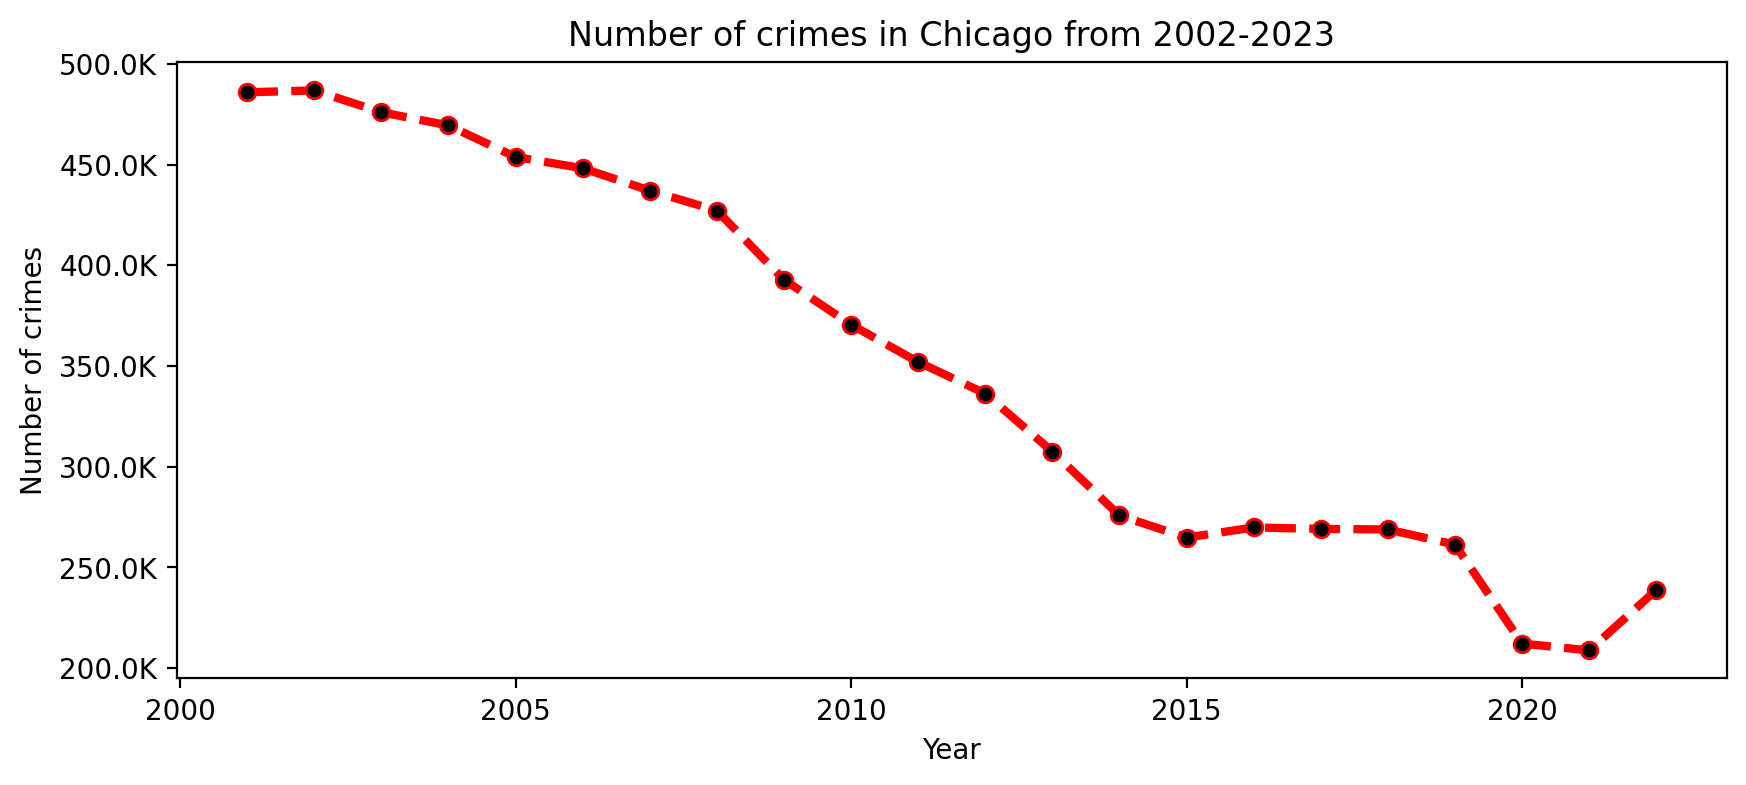

In [ ]:
# display a graph
fig, ax = plt.subplots(figsize=(10,4))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formattick))

plt.plot(df_count['Year'], df_count['Count'],color='r',marker='o', markerfacecolor='k',linestyle='--', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes in Chicago from 2002-2023')
plt.show()

#5. Before Covid vs. during COVID-19, How are crimes different?

The ongoing COVID-19 pandemic began in the U.S. state of Illinois on January 24, 2020.
https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Illinois


In [ ]:
names_to_match1 = [2017,2018,2019] # before Covid-19
names_to_match2 = [2020,2021,2022] # during Covid-19

df_beforecovid = df[df['Year'].isin(names_to_match1)].sort_values(by=['Year'])
df_covid = df[df['Year'].isin(names_to_match2)].sort_values(by=['Year'])

a1= len(df_beforecovid)
a2 = len(df_covid)
print("Number of crimes before COVID-19: ", a1)
print("Number of crimes COVID-19: ", a2)

Number of crimes before COVID-19:  785158
Number of crimes COVID-19:  642184


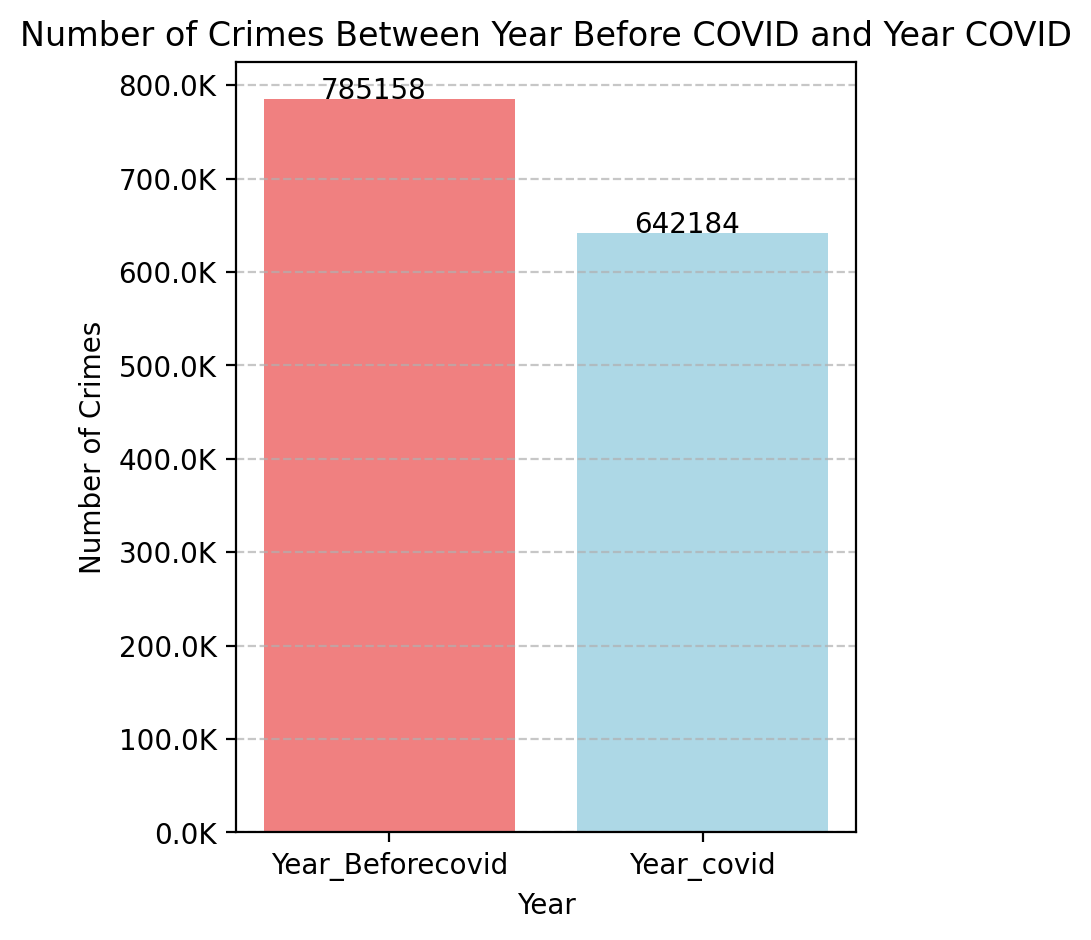

In [ ]:
fig, ax = plt.subplots(figsize=(4, 5))

bars = plt.bar(x_axis, y1,color=['lightcoral', 'lightblue'], width=0.8)

for bar, y_val in zip(bars, y1):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, y_val + 100, str(y_val), ha='center', color='black')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(formattick))


plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Number of Crimes Between Year Before COVID and Year COVID")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#6. Compare the primary types of crimes in the years before Covid-19 and during Covid-19.

In [9]:
unique_values1 = df_beforecovid['Primary Type'].unique()
unique_values2 = df_covid['Primary Type'].unique()
year1 = [2017,2018,2019]
year2 = [2020,2021,2022]

tofc1 = []
tofc2 = []

for i in range(len(unique_values1)):
    count = len(df_beforecovid[df_beforecovid['Primary Type'] == unique_values1[i]])
    arrest = len(df_beforecovid[(df_beforecovid['Primary Type'] == unique_values1[i]) & (df_beforecovid['Arrest'] == True)])
    not_arrest = len(df_beforecovid[(df_beforecovid['Primary Type'] == unique_values1[i]) & (df_beforecovid['Arrest'] == False)])
    info = pd.DataFrame({'Primary Type': [unique_values1[i]], 'Count': [count], 'Arrest':[arrest], 'Not Arrest':[not_arrest]})
    tofc1.append(info)

df_type1 = pd.concat(tofc1, ignore_index=True)

df_type_filtered1 = df_type1[df_type1['Count'] >= 25000]
count_sum = df_type1[df_type1['Count'] < 25000]['Count'].sum()
arrest_sum = df_type1[df_type1['Count'] < 25000]['Arrest'].sum()
not_arrest_sum = df_type1[df_type1['Count'] < 25000]['Not Arrest'].sum()
other = pd.DataFrame({'Primary Type': ['OTHER'], 'Count': [count_sum], "Arrest": [arrest_sum], "Not Arrest": [not_arrest_sum]})
df_type_filtered1 = df_type_filtered1.sort_values(by='Primary Type', ascending=False)
df_type_filtered1 = pd.concat([df_type_filtered1, other], ignore_index=True)
df_type_filtered1["Difference"] = abs(df_type_filtered1["Not Arrest"] - df_type_filtered1["Arrest"])


for i in range(len(unique_values2)):
    count = len(df_covid[df_covid['Primary Type'] == unique_values2[i]])
    info = pd.DataFrame({'Primary Type': [unique_values2[i]], 'Count': [count]})
    tofc2.append(info)

df_type2 = pd.concat(tofc2, ignore_index=True)

tofc3=[]
wanted_type = ['THEFT',"BATTERY","CRIMINAL DAMAGE","ASSAULT","OTHER OFFENSE","DECEPTIVE PRACTICE","NARCOTICS","BURGLARY","ROBBERY","MOTOR VEHICLE THEFT"]
for i in range(len(wanted_type)):
    count = len(df_covid[df_covid['Primary Type'] == wanted_type[i]])
    arrest = len(df_covid[(df_covid['Primary Type'] == wanted_type[i]) & (df_covid['Arrest'] == True)])
    not_arrest = len(df_covid[(df_covid['Primary Type'] == wanted_type[i]) & (df_covid['Arrest'] == False)])
    info = pd.DataFrame({'Primary Type': [wanted_type[i]], 'Count': [count],'Arrest':[arrest], 'Not Arrest':[not_arrest]})
    tofc3.append(info)

df_type3 = pd.concat(tofc3, ignore_index=True)

kk = df_covid[~df_covid['Primary Type'].isin(['THEFT',"BATTERY","CRIMINAL DAMAGE","ASSAULT","OTHER OFFENSE","DECEPTIVE PRACTICE","NARCOTICS","BURGLARY","ROBBERY","MOTOR VEHICLE THEFT"])]
arrest_sum = (kk['Arrest'] == True).sum()
not_arrest_sum = (kk['Arrest'] == False).sum()
info = pd.DataFrame({'Primary Type': ['Other'], 'Count': [len(kk)], "Arrest": [arrest_sum], "Not Arrest": [not_arrest_sum]})
df_type_filtered2 = df_type3.sort_values(by='Primary Type', ascending=False)
df_type_filtered2 = pd.concat([df_type_filtered2, info], ignore_index=True)
df_type_filtered2["Difference"] = abs(df_type_filtered2["Not Arrest"] - df_type_filtered2["Arrest"])




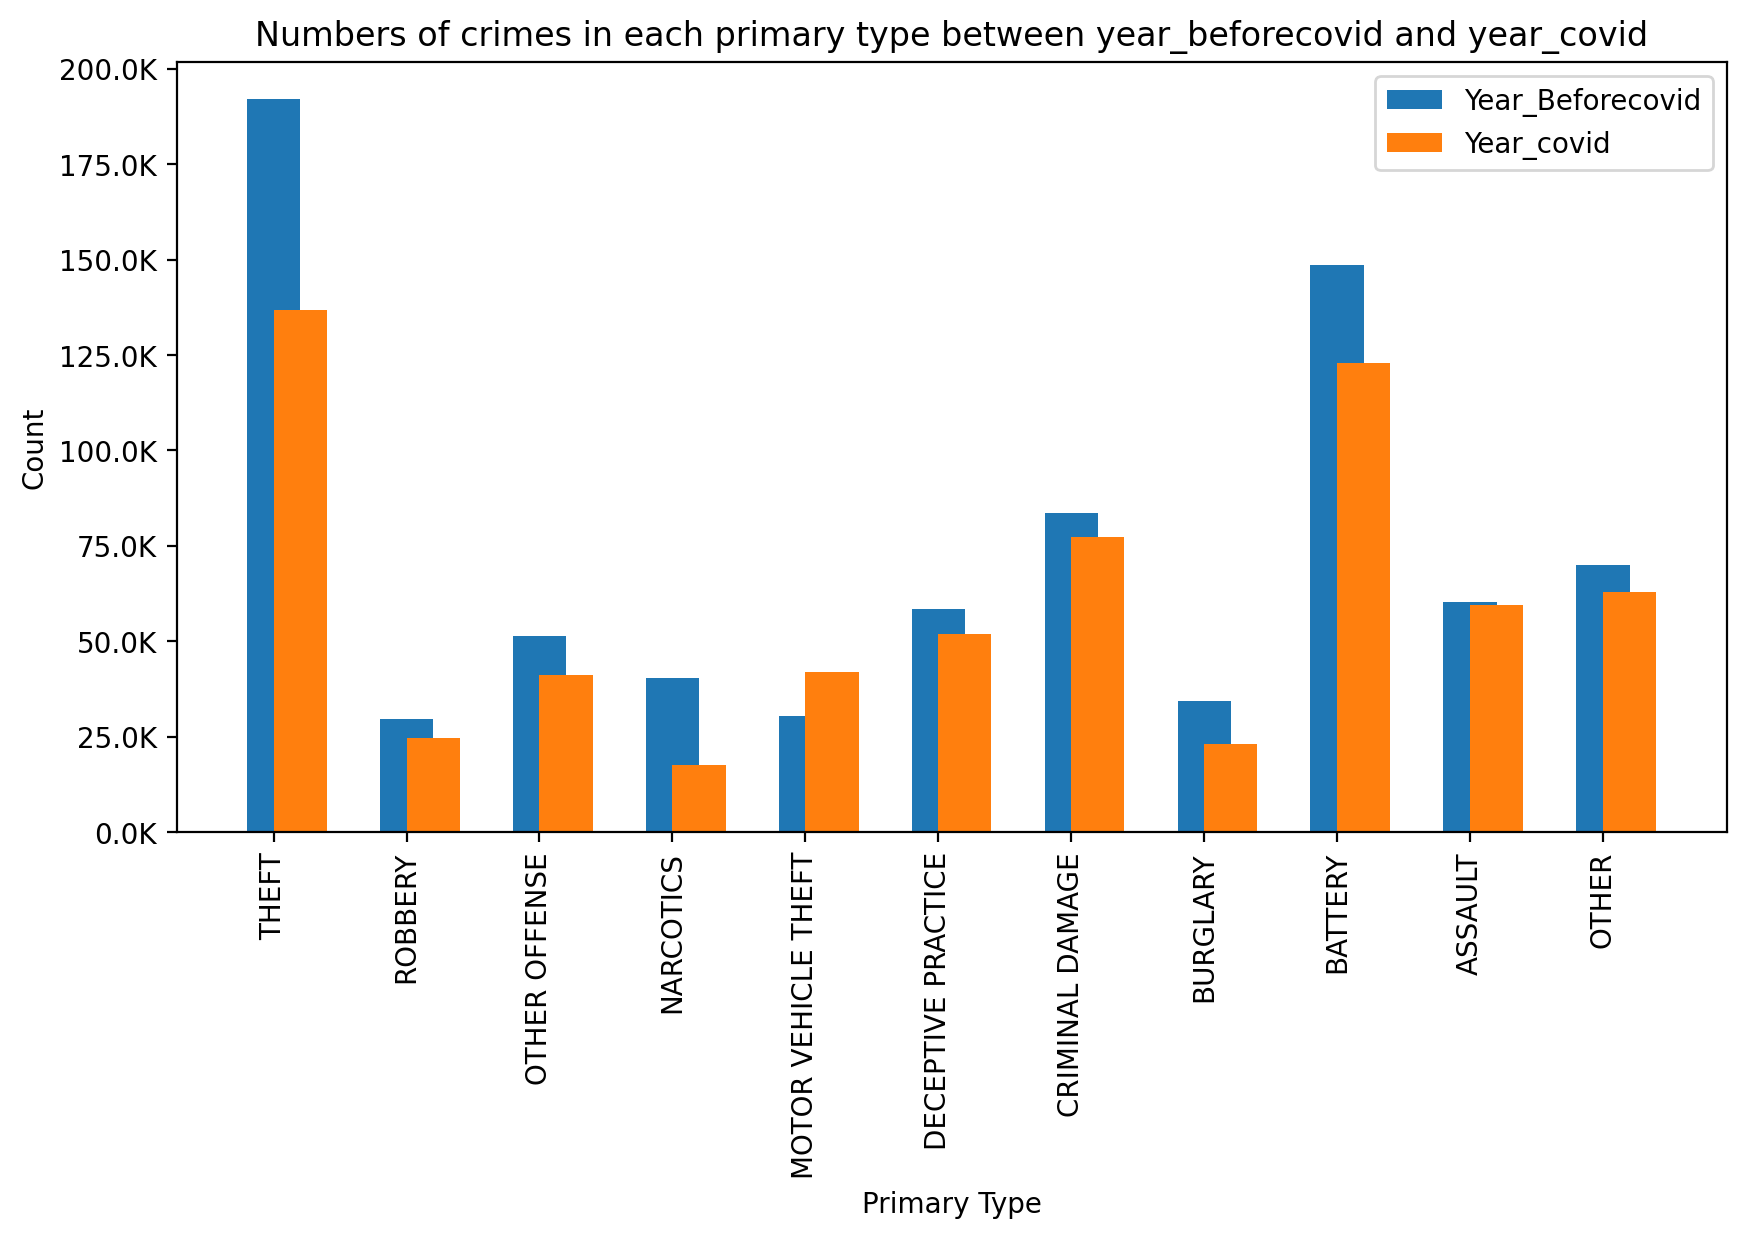

In [12]:
x = range(len(df_type_filtered1))

fig,ax = plt.subplots(figsize=(10,5))

plt.bar(x, df_type_filtered1["Count"], width=0.4, label='Year_Beforecovid', align='center')
plt.bar(x, df_type_filtered2["Count"], width=0.4, label='Year_covid', align='edge')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formattick))

plt.xlabel('Primary Type')
plt.ylabel('Count')

plt.xticks(x, df_type_filtered1["Primary Type"])
plt.legend()
plt.xticks(rotation=90)
plt.title("Numbers of crimes in each primary type between year_beforecovid and year_covid")
plt.show()


In [ ]:
df_type_filtered1


Primary Type   Count  Arrest  Not Arrest  Difference
0                 THEFT  189282   18890      170392      151502
1               ROBBERY   29539    2431       27108       24677
2         OTHER OFFENSE   50634   11028       39606       28578
3             NARCOTICS   39267   39250          17       39233
4   MOTOR VEHICLE THEFT   30236    1979       28257       26278
5    DECEPTIVE PRACTICE   51444    2601       48843       46242
6       CRIMINAL DAMAGE   83265    5103       78162       73059
7              BURGLARY   34268    1785       32483       30698
8               BATTERY  148325   30760      117565       86805
9               ASSAULT   60191   10564       49627       39063
10                OTHER   68707   36888       31819        5069

In [ ]:
df_type_filtered2


Primary Type   Count  Arrest  Not Arrest  Difference
0                 THEFT  132618    6333      126285      119952
1               ROBBERY   24688    1555       23133       21578
2         OTHER OFFENSE   40244    5321       34923       29602
3             NARCOTICS   15324   15016         308       14708
4   MOTOR VEHICLE THEFT   41629    1421       40208       38787
5    DECEPTIVE PRACTICE   45134     834       44300       43466
6       CRIMINAL DAMAGE   76454    2940       73514       70574
7              BURGLARY   22823    1144       21679       20535
8               BATTERY  122404   18527      103877       85350
9               ASSAULT   59150    6157       52993       46836
10                Other   61716   26377       35339        8962

#7 arrested vs. not arrested
-------------


In [13]:
# trend of cases that occurred before Covid-19 and during Covid-19
year = [2017,2018,2019]
nofc = []

for i in range(len(year)):
    count = len(df[df['Year'] == year[i]])
    info = pd.DataFrame({'Year': [year[i]], 'Count': [count]})
    nofc.append(info)

df_count1 = pd.concat(nofc, ignore_index=True)


year = [2020,2021,2022]
nofc = []

for i in range(len(year)):
    count = len(df[df['Year'] == year[i]])
    info = pd.DataFrame({'Year': [year[i]], 'Count': [count]})
    nofc.append(info)

df_count2 = pd.concat(nofc, ignore_index=True)

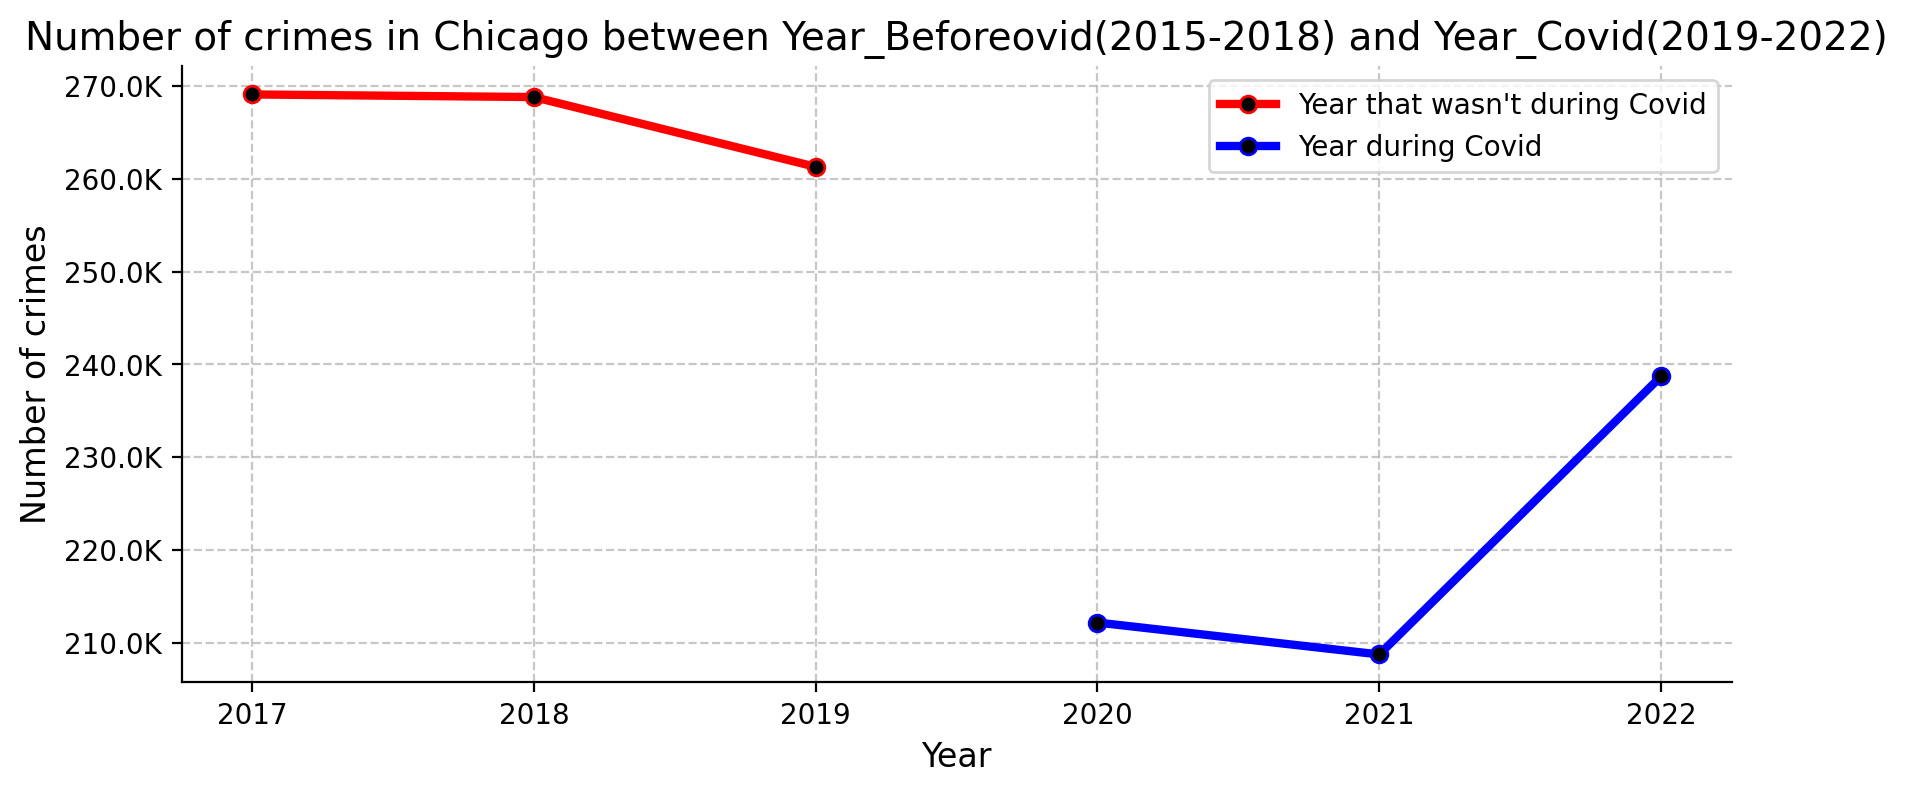

In [14]:
# display a graph
fig, ax = plt.subplots(figsize=(10,4))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formattick))

plt.plot(df_count1['Year'], df_count1['Count'],label="Year that wasn't during Covid", color='r', marker='o', markerfacecolor='k', linestyle='-', linewidth=3)
plt.plot(df_count2['Year'], df_count2['Count'],label='Year during Covid', color='b', marker='o', markerfacecolor='k', linestyle='-', linewidth=3)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of crimes', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.title('Number of crimes in Chicago between Year_Beforeovid(2015-2018) and Year_Covid(2019-2022)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', labelsize=10)

plt.show()

In [ ]:
Arrest_1 = df_type_filtered1['Arrest'].sum()
NArrest_1 = df_type_filtered1['Not Arrest'].sum()
Arrest_2 = df_type_filtered2['Arrest'].sum()
NArrest_2 = df_type_filtered2['Not Arrest'].sum()

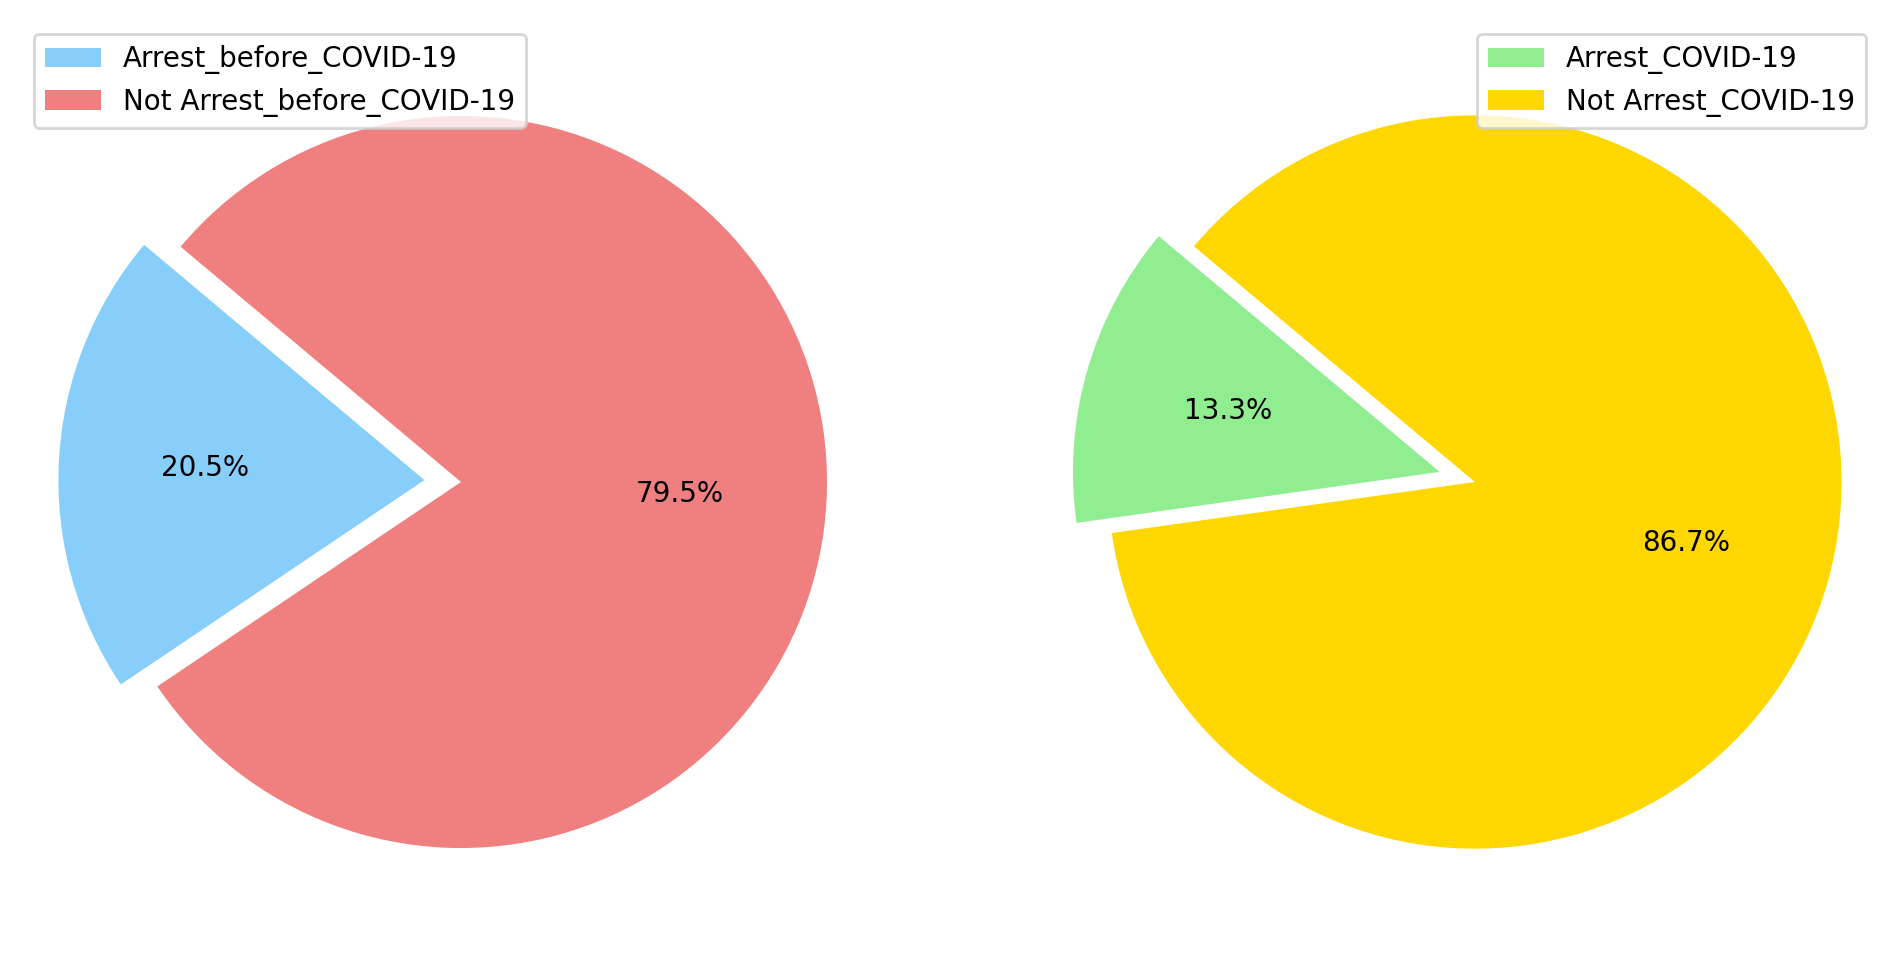

In [ ]:
Labels_1 = ['Arrest_before_COVID-19','Not Arrest_before_COVID-19']
values_1 = [Arrest_1,NArrest_1]

Labels_2 = ['Arrest_COVID-19','Not Arrest_COVID-19']
values_2 =  [Arrest_2,NArrest_2]
plt.figure(figsize=(12, 6))


plt.subplot(1,2,1)
colors_1 = [ 'lightskyblue','lightcoral']
explode_1 = (0.1, 0)
plt.pie(values_1  ,autopct='%1.1f%%', startangle=140 ,colors=colors_1, explode=explode_1)
plt.axis('equal')
plt.legend(Labels_1, loc='upper left')

plt.subplot(1,2,2)
colors_2 = ['lightgreen','gold']
explode_2 = (0, 0.1)
plt.pie(values_2  ,autopct='%1.1f%%',startangle=140 , colors=colors_2, explode=explode_2 )
plt.axis('equal')
plt.legend(Labels_2, loc='upper right')



plt.show()

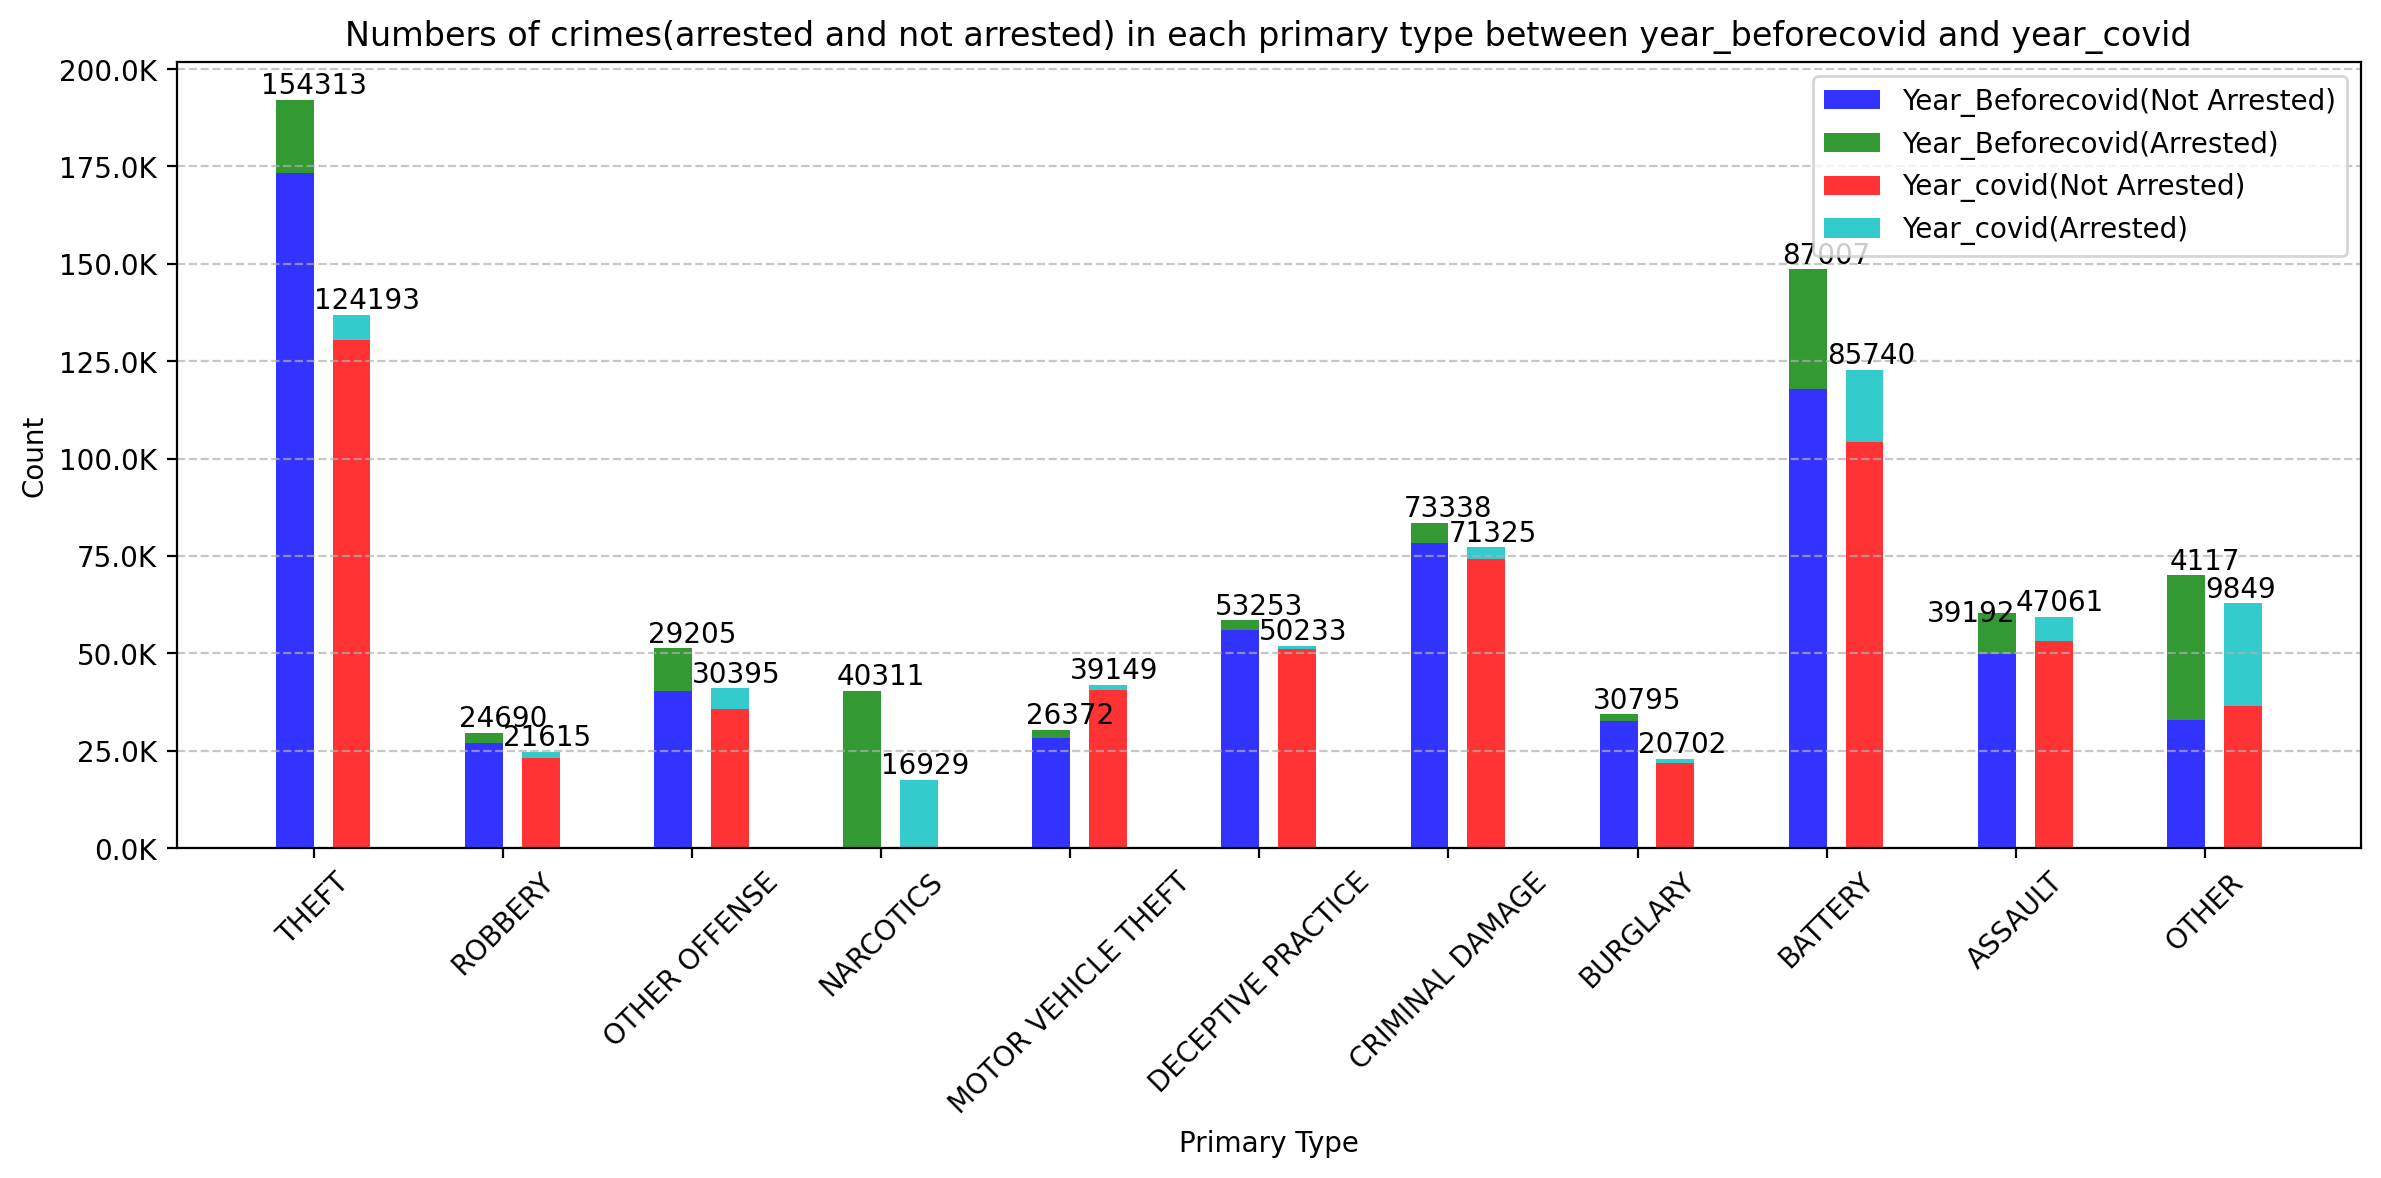

In [17]:
x = range(len(df_type_filtered1))

fig, ax = plt.subplots(figsize=(12, 6))

opacity = 0.8

colors = ['b', 'g', 'r', 'c']

bar_width = 0.2

x_adjusted = [i - bar_width/2 for i in x]
x_adjusted2 = [i + bar_width/2 for i in x]

bar1 = plt.bar(x_adjusted, df_type_filtered1["Not Arrest"], width=bar_width, alpha=opacity, color=colors[0], label='Year_Beforecovid(Not Arrested)')
bar2 = plt.bar(x_adjusted, df_type_filtered1["Arrest"], width=bar_width, alpha=opacity, color=colors[1], bottom=df_type_filtered1["Not Arrest"], label='Year_Beforecovid(Arrested)')
bar3 = plt.bar(x_adjusted2, df_type_filtered2["Not Arrest"], width=bar_width, alpha=opacity, color=colors[2], align='edge', label='Year_covid(Not Arrested)')
bar4 = plt.bar(x_adjusted2, df_type_filtered2["Arrest"], width=bar_width, alpha=opacity, color=colors[3], bottom=df_type_filtered2["Not Arrest"], align='edge', label='Year_covid(Arrested)')


ax.yaxis.set_major_formatter(ticker.FuncFormatter(formattick))

for i, diff in enumerate(df_type_filtered1["Difference"]):
    if i == 9:
        plt.text(i, df_type_filtered1["Not Arrest"].iloc[i] + df_type_filtered1["Arrest"].iloc[i], f'{diff:.0f}', ha='right', va='center')
    else:
        plt.text(i, df_type_filtered1["Not Arrest"].iloc[i] + df_type_filtered1["Arrest"].iloc[i], f'{diff:.0f}', ha='center', va='bottom')

for i, diff in enumerate(df_type_filtered2["Difference"]):
    plt.text(i, df_type_filtered2["Not Arrest"].iloc[i] + df_type_filtered2["Arrest"].iloc[i], f'{diff:.0f}', ha='left', va='bottom')

plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Numbers of crimes(arrested and not arrested) in each primary type between year_beforecovid and year_covid')
plt.xticks(x, df_type_filtered1["Primary Type"], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# References



https://chicago.suntimes.com/2022/7/15/23216341/violent-crime-soared-arrests-historic-lows-chicago-police-department-david-brown-lori-lightfoot

https://abc7chicago.com/chicago-homicides-2019-murders-crime-statistics-in/5804243/

https://home.chicagopolice.org

https://wirepoints.org/100-a-day-chicago-motor-vehicle-thefts-explode-as-safe-t-act-changes-debated/

https://en.wikipedia.org/wiki/Austin,_Chicago


